# Statistiques

La classe statistiques permet d'abord de collecter la population par un grand nombre de variable pour chaque année. Avec ce cube de données, la classe permet ensuite de sortir les statistiques de nombres et proportions. On en donne un exemple ici. 

## Simulation scénario de référence

In [1]:
import sys
sys.path.append('/Users/ydecarie/Dropbox (CEDIA)/OLG_CAN/simgen/')
from matplotlib import pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
from simgen import model

In [3]:
yr_debut=2017
yr_fin=2060

In [6]:
base = model(start_yr=yr_debut,stop_yr=yr_fin)
base.startpop('startpopchsld')
base.immig_assumptions(init='newimmpopchsld')
base.birth_assumptions(scenario='reference')
base.dead_assumptions(scenario='low')

In [7]:
base.simulate(rep=1)

In [6]:
base.stats.save('simpop.pkl')

## Le cube de donnée

À l'intérieur d'un modèle, une instance de la classe stats a été lancée. Elle définie des stratas pour cumuler les fréquences d'individus. Par défaut, elle fait (age,male,educ,married,nkids). Après avoir crée l'instance, le modèle va l'initatiser en utilisant la population de départ. Il va ensuite la populer avec les années subséquentes de la simulation. On peut voir ce cube à l'aide de stats.counts. 

In [8]:
base.stats.counts

2017          2018  \
age male  insch educ married nkids chsld                               
0   False False none False   0     False  41136.960108  41594.385827   
    True  False none False   0     False  43243.726267  41594.385827   
1   False False dec  False   0     False      0.000000      0.000000   
                                   True       0.000000      0.000000   
                             1     False      0.000000      0.000000   
...                                                ...           ...   
110 True  True  uni  True    3     True       0.000000      0.000000   
                             4     False      0.000000      0.000000   
                                   True       0.000000      0.000000   
                             5     False      0.000000      0.000000   
                                   True       0.000000      0.000000   

                                                  2019          2020  \
age male  insch educ married nkids chsld                               
0   False False none False   0     False  43106.624672  41217.789203   
    True  False none False   0     False  40357.477690  42953.275064   
1   False False dec  False   0     False      0.000000      0.000000   
                                   True       0.000000      0.000000   
                             1     False      0.000000      0.000000   
...                                                ...           ...   
110 True  True  uni  True    3     True       0.000000      0.000000   
                             4     False      0.000000      0.000000   
                                   True       0.000000      0.000000   
                             5     False      0.000000      0.000000   
                                   True       0.000000      0.000000   

                                                  2021          2022  \
age male  insch educ married nkids chsld                               
0   False False none False   0     False  41109.431851  42372.271978   
    True  False none False   0     False  43663.568149  42605.728022   
1   False False dec  False   0     False      0.000000      0.000000   
                                   True       0.000000      0.000000   
                             1     False      0.000000      0.000000   
...                                                ...           ...   
110 True  True  uni  True    3     True       0.000000      0.000000   
                             4     False      0.000000      0.000000   
                                   True       0.000000      0.000000   
                             5     False      0.000000      0.000000   
                                   True       0.000000      0.000000   

                                                  2023          2024  \
age male  insch educ married nkids chsld                               
0   False False none False   0     False  41066.121131  43594.415094   
    True  False none False   0     False  43582.707941  41136.886792   
1   False False dec  False   0     False      0.000000      0.000000   
                                   True       0.000000      0.000000   
                             1     False      0.000000      0.000000   
...                                                ...           ...   
110 True  True  uni  True    3     True       0.000000      0.000000   
                             4     False      0.000000      0.000000   
                                   True       0.000000      0.000000   
                             5     False      0.000000      0.000000   
                                   True       0.000000      0.000000   

                                                  2025          2026  ...  \
age male  insch educ married nkids chsld                              ...   
0   False False none False   0     False  42299.287411  39125.911082  ...   
    True  False none False   0     False  42500.712589  45120.131443  .

## Population par âge et totale

On peut obtenir la population totale en utilisant la fonction

In [8]:
base.stats.freq()

2017    8.298827e+06
2018    8.347161e+06
2019    8.372784e+06
2020    8.424192e+06
2021    8.466118e+06
2022    8.514569e+06
2023    8.567431e+06
2024    8.631483e+06
2025    8.691570e+06
2026    8.742585e+06
2027    8.787746e+06
2028    8.837237e+06
2029    8.886170e+06
2030    8.935498e+06
2031    8.966552e+06
2032    9.024003e+06
2033    9.052875e+06
2034    9.098201e+06
2035    9.136579e+06
2036    9.163517e+06
2037    9.216916e+06
2038    9.246821e+06
2039    9.273736e+06
2040    9.303496e+06
2041    9.345941e+06
2042    9.365195e+06
2043    9.396621e+06
2044    9.431872e+06
2045    9.458212e+06
2046    9.496330e+06
2047    9.535143e+06
2048    9.562788e+06
2049    9.593873e+06
2050    9.622662e+06
2051    9.641082e+06
2052    9.670572e+06
2053    9.701476e+06
2054    9.717269e+06
2055    9.758927e+06
2056    9.791023e+06
2057    9.814363e+06
2058    9.856537e+06
2059    9.897477e+06
2060    9.928623e+06
2061    9.966510e+06
dtype: float64

Et un beau graphique en rajoutant plot()

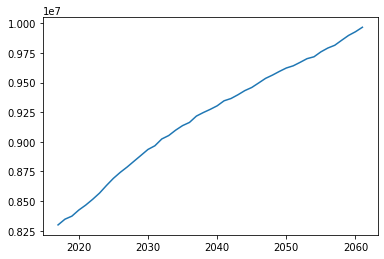

In [9]:
base.stats.freq().plot()

On voit qu'on a un problème au départ. Pour diagnostiquer, allons voir la population par âge: 

In [10]:
popage = base.stats.freq('age')
popage.head()

age,0,1,2,3,4,5,6,7,8,9,...,101,102,103,104,105,106,107,108,109,110
2017,84380.686374,87169.700644,88564.207778,89711.625055,90498.911364,90313.844061,90393.873165,91387.234417,91831.395943,90068.754931,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2018,83655.353349,84146.692026,86992.921594,88996.427916,90710.579470,91302.536988,90700.322745,90715.069952,93026.942490,91826.953090,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2019,83570.846871,83364.883372,83864.582131,87401.183410,90312.115373,91137.609952,91306.484181,91383.262599,92180.766784,92985.417826,...,879.223044,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020,84048.638070,83347.693742,83103.662288,83466.481382,88621.619170,91003.036129,91300.641478,91975.864358,92868.158853,92176.132187,...,387.811741,691.438807,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2021,84549.913158,83596.155496,83265.522470,83160.609588,84874.785742,89512.229098,91049.511877,91048.575900,93823.126482,92457.197063,...,0.000000,387.811741,226.014318,0.0,0.0,0.0,0.0,0.0,0.0,0.0


On peut exprimer en proportion...

In [11]:
base.stats.prop('age').head()

age,0,1,2,3,4,5,6,7,8,9,...,101,102,103,104,105,106,107,108,109,110
2017,0.010168,0.010504,0.010672,0.010810,0.010905,0.010883,0.010892,0.011012,0.011066,0.010853,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2018,0.010022,0.010081,0.010422,0.010662,0.010867,0.010938,0.010866,0.010868,0.011145,0.011001,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2019,0.009981,0.009957,0.010016,0.010439,0.010786,0.010885,0.010905,0.010914,0.011010,0.011106,...,0.000105,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020,0.009977,0.009894,0.009865,0.009908,0.010520,0.010803,0.010838,0.010918,0.011024,0.010942,...,0.000046,0.000082,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2021,0.009987,0.009874,0.009835,0.009823,0.010025,0.010573,0.010755,0.010754,0.011082,0.010921,...,0.000000,0.000046,0.000027,0.0,0.0,0.0,0.0,0.0,0.0,0.0


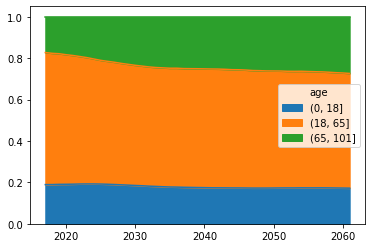

In [12]:
base.stats.prop('age',bins=[0,18,65,101]).plot.area()

In [13]:
freqs = base.stats.freq('age',bins=[0,18,80,101])

In [24]:
freqs.head(10)

age,"(0, 18]","(18, 80]","(80, 101]"
2017,1.554571e+06,6.323574e+06,336301.301300
2018,1.565896e+06,6.367211e+06,330397.557055
2019,1.579036e+06,6.391375e+06,318803.080934
2020,1.591403e+06,6.426504e+06,321544.797920
2021,1.603761e+06,6.457112e+06,320081.406778
2022,1.620181e+06,6.474037e+06,335372.914279
2023,1.633342e+06,6.507473e+06,341844.619682
2024,1.645513e+06,6.537124e+06,364444.163310
2025,1.652155e+06,6.574179e+06,380544.907113
2026,1.653536e+06,6.617733e+06,386847.894386


## Autres variables et sous-ensemble

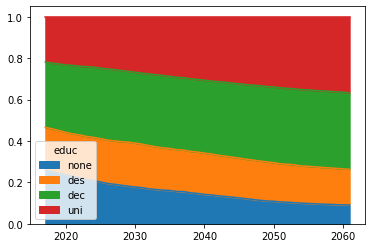

In [18]:
peduc = base.stats.prop('educ',sub='age>=30')[['none','des','dec','uni']].plot.area()

On peut aussi rajouter des conditions pour regarder des sous-groupes

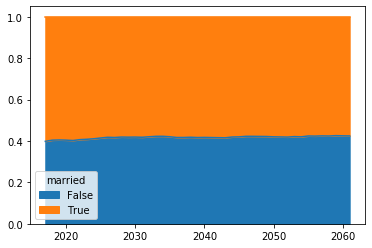

In [22]:
base.stats.prop('married',sub='age>18').plot.area()

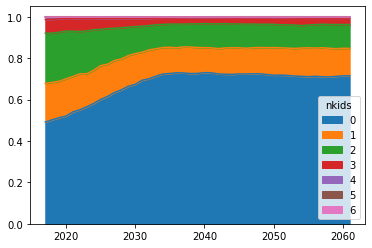

In [20]:
base.stats.prop('nkids',sub='age>=18 & age<=45 & male==False').plot.area()